In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Month,Total_CO2_Emissions
0,2007-01-01,143666416.6
1,2007-02-01,144120826.6
2,2007-03-01,146940841.6
3,2007-04-01,146158543.6
4,2007-05-01,147495043.6


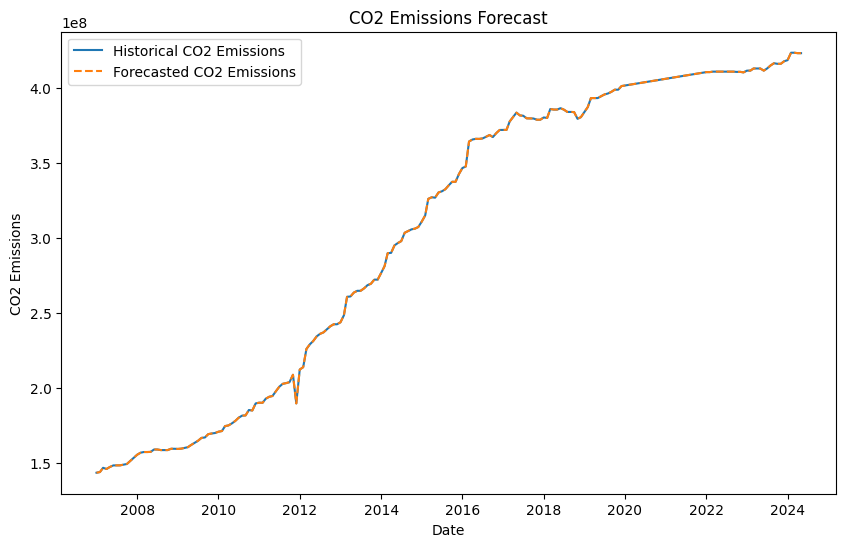

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.DataFrame(data)

df['Month'] = pd.to_datetime(df['Month'])

df.set_index('Month', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['Total_CO2_Emissions'], label='Historical CO2 Emissions')
plt.plot(df, label='Forecasted CO2 Emissions', linestyle='--')
plt.title('CO2 Emissions Forecast')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2007-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total_CO2_Emissions  177 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [ ]:
df = pd.read_csv('data.csv')

Epoch 1/50
131/131 [==============================] - 9s 15ms/step - loss: 0.0149
Epoch 2/50
131/131 [==============================] - 2s 17ms/step - loss: 8.7177e-04
Epoch 3/50
131/131 [==============================] - 2s 18ms/step - loss: 7.5328e-04
Epoch 4/50
131/131 [==============================] - 2s 17ms/step - loss: 6.0740e-04
Epoch 5/50
131/131 [==============================] - 2s 16ms/step - loss: 9.6189e-04
Epoch 6/50
131/131 [==============================] - 2s 14ms/step - loss: 7.4169e-04
Epoch 7/50
131/131 [==============================] - 1s 9ms/step - loss: 6.5812e-04
Epoch 8/50
131/131 [==============================] - 1s 9ms/step - loss: 8.9879e-04
Epoch 9/50
131/131 [==============================] - 1s 9ms/step - loss: 4.8642e-04
Epoch 10/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 11/50
131/131 [==============================] - 1s 11ms/step - loss: 8.4490e-04
Epoch 12/50
131/131 [==============================] - 2s 14ms/s

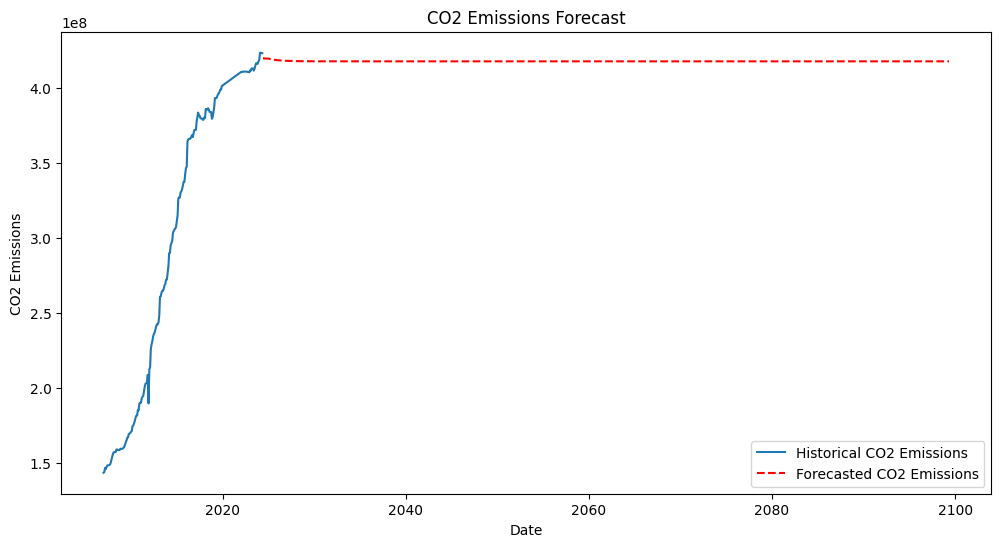

            Forecasted_CO2_Emissions
2024-06-01              4.197075e+08
2024-07-01              4.196886e+08
2024-08-01              4.196745e+08
2024-09-01              4.196473e+08
2024-10-01              4.196102e+08
...                              ...
2099-01-01              4.177094e+08
2099-02-01              4.177094e+08
2099-03-01              4.177094e+08
2099-04-01              4.177094e+08
2099-05-01              4.177094e+08

[900 rows x 1 columns]


In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]
#LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, batch_size=1, epochs=50)

x_input = scaled_data[-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 900):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

forecasted_values = scaler.inverse_transform(lst_output)

forecast_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=900, freq='MS')

forecast_df = pd.DataFrame(forecasted_values, index=forecast_dates, columns=['Forecasted_CO2_Emissions'])

plt.figure(figsize=(12, 6))
plt.plot(df['Total_CO2_Emissions'], label='Historical CO2 Emissions')
plt.plot(forecast_df, label='Forecasted CO2 Emissions', linestyle='--', color='red')
plt.title('CO2 Emissions Forecast')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

print(forecast_df)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Month,Ownership,Coal,Lignite,Gas,Diesel,All India Thermal,Total_CO2_Emissions
0,01/01/07,All India,69366.38,0,13581.71,1201.75,84149.84,143666416.6
1,01/02/07,All India,69621.38,0,13581.71,1201.75,84404.84,144120826.6
2,01/03/07,All India,71121.38,0,13691.71,1201.75,86014.84,146940841.6
3,01/04/07,All India,70682.38,0,13691.71,1201.75,85575.84,146158543.6
4,01/05/07,All India,71432.38,0,13691.71,1201.75,86325.84,147495043.6


In [ ]:
df = df[['Month', 'Total_CO2_Emissions']]


In [ ]:
df.head()

,Month,Total_CO2_Emissions
0,01/01/07,143666416.6
1,01/02/07,144120826.6
2,01/03/07,146940841.6
3,01/04/07,146158543.6
4,01/05/07,147495043.6


In [ ]:
df.shape

(177, 2)

In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd



df = pd.DataFrame(data)

df['Month'] = pd.to_datetime(df['Month'], format='%d/%m/%y')

daily_data = []

for index, row in df.iterrows():
    month_start = row['Month']
    month_end = month_start + MonthEnd(1)

    days_in_month = pd.date_range(start=month_start, end=month_end, freq='D')

    daily_emission = row['Total_CO2_Emissions'] / len(days_in_month)

    for day in days_in_month:
        daily_data.append([day, daily_emission])

df_daily = pd.DataFrame(daily_data, columns=['Date', 'Daily_CO2_Emissions'])

print(df_daily)


           Date  Daily_CO2_Emissions
0    2007-01-01         4.634401e+06
1    2007-01-02         4.634401e+06
2    2007-01-03         4.634401e+06
3    2007-01-04         4.634401e+06
4    2007-01-05         4.634401e+06
...         ...                  ...
5382 2024-05-27         1.365026e+07
5383 2024-05-28         1.365026e+07
5384 2024-05-29         1.365026e+07
5385 2024-05-30         1.365026e+07
5386 2024-05-31         1.365026e+07

[5387 rows x 2 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily = df_daily.sort_values('Date')
df_daily = df_daily.set_index('Date')

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_daily['Daily_CO2_Emissions'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

train_rmse = np.sqrt(np.mean((train_predictions - y_train)**2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test)**2))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

last_sequence = scaled_data[-seq_length:]
future_predictions = []

for _ in range(30):
    next_pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_dates = pd.date_range(start=df_daily.index[-1] + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_CO2_Emissions': future_predictions.flatten()})
print(future_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.1235 - val_loss: 6.5335e-04
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 6.8477e-04 - val_loss: 5.3525e-04
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 5.7207e-04 - val_loss: 4.1167e-04
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 5.0280e-04 - val_loss: 5.0772e-04
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 5.0989e-04 - val_loss: 3.3851e-04
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 4.0536e-04 - val_loss: 4.5239e-04
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 5.2099e-04 - val_loss: 4.7898e-04
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 4.1597e-04 - val_loss: 4.4138e-04
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 4.0120e-04 - val_loss: 2.6826e-04
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 3.4951e-04 - val_loss: 2.5463e-04
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/st

In [ ]:

last_sequence = scaled_data[-seq_length:]
future_predictions = []

days_in_25_years = 365 * 25 + 6

for _ in range(days_in_25_years):
    next_pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_dates = pd.date_range(start=df_daily.index[-1] + pd.Timedelta(days=1), periods=days_in_25_years)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_CO2_Emissions': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)


plt.figure(figsize=(20, 10))

plt.plot(df_daily.index, df_daily['Daily_CO2_Emissions'], label='Historical Data', color='blue')

plt.plot(future_df.index, future_df['Predicted_CO2_Emissions'], label='25-Year Prediction', color='red')

plt.title('CO2 Emissions: Historical Data and 25-Year Prediction')
plt.xlabel('Date')
plt.ylabel('Daily CO2 Emissions')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('co2_emissions_25_year_forecast.png')
plt.close()

print("Plot saved as 'co2_emissions_25_year_forecast.png'")

print("\nSummary Statistics for 25-Year Prediction:")
print(future_df['Predicted_CO2_Emissions'].describe())

total_emissions = future_df['Predicted_CO2_Emissions'].sum()
print(f"\nTotal Predicted CO2 Emissions over 25 years: {total_emissions:.2f}")

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

NameError: name 'plt' is not defined